In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/usa-covid19-vaccinations/us_state_vaccinations.csv


In [2]:
#import other packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#import the plotly packages for geospatial data visualization
import plotly.offline as py
from plotly import tools
import plotly.graph_objs as go
import plotly.express as px

In [3]:
path = '/kaggle/input/usa-covid19-vaccinations/us_state_vaccinations.csv'

df = pd.read_csv(path)

In [4]:
df.head(5)

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7557.0,7498.0,1529.0,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6003 entries, 0 to 6002
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 6003 non-null   object 
 1   location                             6003 non-null   object 
 2   total_vaccinations                   5733 non-null   float64
 3   total_distributed                    5635 non-null   float64
 4   people_vaccinated                    5623 non-null   float64
 5   people_fully_vaccinated_per_hundred  5247 non-null   float64
 6   total_vaccinations_per_hundred       5349 non-null   float64
 7   people_fully_vaccinated              5541 non-null   float64
 8   people_vaccinated_per_hundred        5324 non-null   float64
 9   distributed_per_hundred              5336 non-null   float64
 10  daily_vaccinations_raw               5938 non-null   float64
 11  daily_vaccinations            

In [6]:
df.describe()

,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
count,5.733000e+03,5.635000e+03,5.623000e+03,5247.000000,5349.000000,5.541000e+03,5324.000000,5336.000000,5.938000e+03,5.938000e+03,5539.000000,5635.000000
mean,2.757342e+06,3.613713e+06,1.811747e+06,9.275039,26.626332,9.214483e+05,17.600601,37.015768,6.546752e+04,6.276146e+04,5873.801769,0.693511
std,1.239373e+07,1.621263e+07,8.181023e+06,7.142317,17.068671,4.518475e+06,10.262167,21.544742,2.747722e+05,2.539479e+05,2663.441663,0.162005
min,4.160000e+02,6.000000e+03,4.010000e+02,0.000000,0.170000,1.000000e+00,0.240000,6.140000,-3.593000e+03,0.000000e+00,0.000000,0.043000
25%,2.126250e+05,3.287250e+05,1.511965e+05,2.710000,11.660000,4.407300e+04,8.990000,18.140000,4.067250e+03,6.311500e+03,3818.000000,0.601000
50%,6.747040e+05,9.518750e+05,4.633000e+05,8.170000,23.940000,1.923040e+05,15.990000,33.510000,1.633188e+04,1.825400e+04,5699.000000,0.735000
75%,1.879649e+06,2.355528e+06,1.199941e+06,14.570000,39.590000,6.084920e+05,25.372500,53.000000,4.386300e+04,4.270550e+04,7564.500000,0.803000
max,1.922828e+08,2.453648e+08,1.222955e+08,38.590000,86.480000,7.532228e+07,53.310000,137.380000,4.629928e+06,3.384387e+06,22525.000000,1.105000


In [7]:
df.location.unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'Bureau of Prisons', 'California', 'Colorado', 'Connecticut',
       'Delaware', 'Dept of Defense', 'District of Columbia',
       'Federated States of Micronesia', 'Florida', 'Georgia', 'Guam',
       'Hawaii', 'Idaho', 'Illinois', 'Indian Health Svc', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Long Term Care', 'Louisiana',
       'Maine', 'Marshall Islands', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York State', 'North Carolina', 'North Dakota',
       'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Republic of Palau', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
       'United States', 'Utah', 'Vermont', 'Veterans Health',
       'Virgin Islands', 'Virginia', 'Washington', 'West V

The location does not only contain state names, for example United States is included in location.

In [8]:
#data type Date
from datetime import datetime

df['date']=pd.to_datetime(df['date'])

#determine the date range
print("start date: ",df.date.min())
print("latest date: ",df.date.max())

#number of vaccination days
dates_range_length = len(pd.date_range(df.date.min(), df.date.max()))
print("The date range equals ",dates_range_length," days.")

start date:  2020-12-20 00:00:00
latest date:  2021-04-13 00:00:00
The date range equals  115  days.


The first day of vaccination was December 20th, 2020. The latest date is yesterday, April 13th, 2021. There are 115 days of vaccination included in the date range.

In [9]:
#add month to data frame
df['month'] = df.date.dt.month
df.month.unique()

array([ 1,  2,  3,  4, 12])

In [10]:
#Date by Week Number
df['week'] = df.date.dt.week


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [11]:
state_code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York State': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}
df['State Code'] = df['location'].map(state_code)

In [12]:
df.head(3)

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,month,week,State Code
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207,1,2,AL
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222,1,2,AL
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212,1,2,AL


In [13]:
df['State Code'].isnull().sum()

1311

In [14]:
df['year'] = df.date.dt.year
df_vaccinations_2020 = df[(df.year == 2020)]
df_vaccinations_2020.location.unique()

array(['United States'], dtype=object)

In 2020, the location included was United States.

In [15]:
#Month
df_month = df.groupby(['State Code','month']).daily_vaccinations.sum().reset_index()
df_month = df_month.sort_values(by=['month','State Code'])
df_month['month'] = df_month.month.replace(1,"January-2021")
df_month['month'] = df_month.month.replace(2,"February-2021")
df_month['month'] = df_month.month.replace(3,"March-2021")
df_month['month'] = df_month.month.replace(4,"April-2021")
df_month.head()

,State Code,month,daily_vaccinations
0,AK,January-2021,82115.0
4,AL,January-2021,235312.0
8,AR,January-2021,321332.0
12,AZ,January-2021,402474.0
16,CA,January-2021,2201238.0


In [16]:
#Week
df_week = df.groupby(['State Code','week']).daily_vaccinations.sum().reset_index()
df_week = df_week.sort_values(by=['week','State Code'])
df_week.head()

,State Code,week,daily_vaccinations
0,AK,2,19371.0
14,AL,2,35474.0
28,AR,2,152270.0
42,AZ,2,84444.0
56,CA,2,418697.0


In [17]:
#Daily corona vaccinations on monthly basis
fig1 = px.choropleth(df_month,locations=df_month['State Code'],color=df_month['daily_vaccinations'],
                     color_continuous_scale='YlOrRd',locationmode='USA-states',scope='usa',animation_frame=df_month['month'],
                     title="Vaccinations in the USA on monthly basis",labels={'daily_vaccinations':'Number of Vaccinations'})

fig1.show()

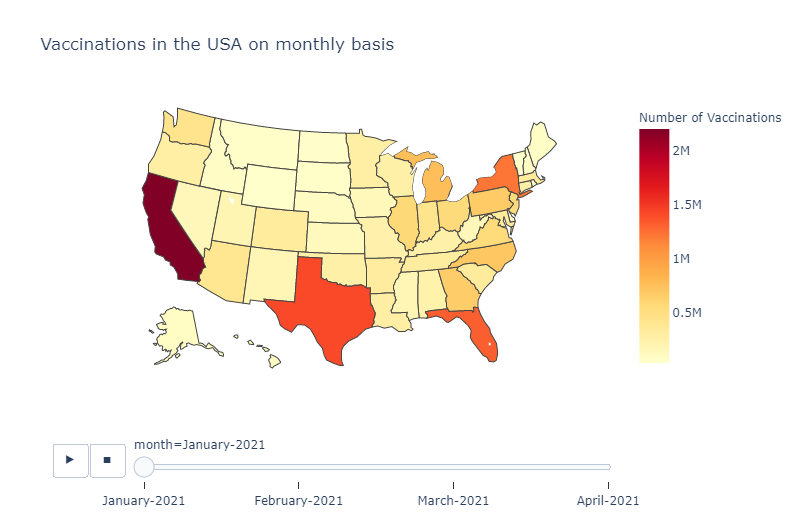

In [18]:
#Daily corona vaccinations on weekly basis
fig2 = px.choropleth(df_week,locations=df_week['State Code'],color=df_week['daily_vaccinations'],
                     color_continuous_scale='YlOrRd',locationmode='USA-states',scope='usa',animation_frame=df_week['week'],
                     title="Vaccinations in the USA on weekly basis",labels={'daily_vaccinations':'Number of Vaccinations'})

fig2.show()

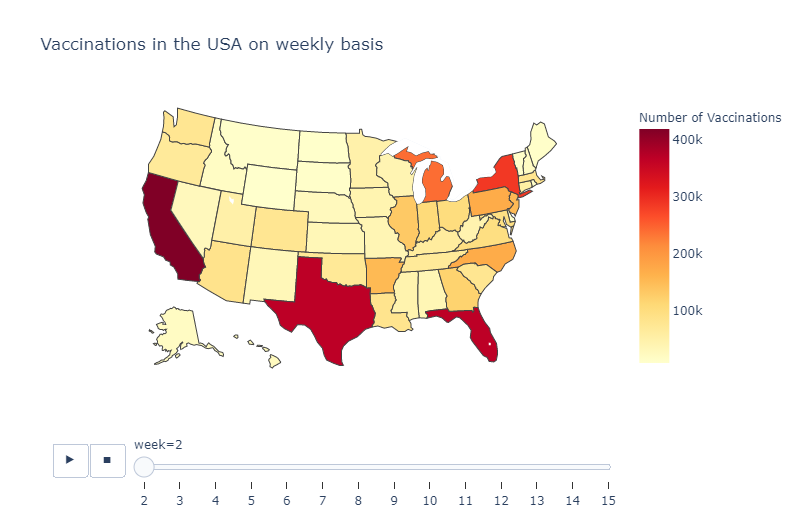

Now, let's focus on the people that got a vaccin.

In [19]:
df_vaccinated = df[(df.date == '2021-04-13')]
df_vaccinated = df_vaccinated[['people_vaccinated','people_fully_vaccinated','State Code']]
df_vaccinated = df_vaccinated.dropna(axis=0)

In [20]:
df_vaccinated.tail()

,people_vaccinated,people_fully_vaccinated,State Code
5634,3360106.0,1998026.0,VA
5726,2862032.0,1860506.0,WA
5818,603993.0,436584.0,WV
5910,2322388.0,1509913.0,WI
6002,181974.0,134166.0,WY


In [21]:
df_vaccinated['State Code'].isnull().sum()


0

In [22]:
#choropleth map people vaccinated 
fig3 = px.choropleth(df_vaccinated,locations=df_vaccinated['State Code'],color=df_vaccinated['people_vaccinated'],
                     color_continuous_scale='YlOrRd',locationmode='USA-states',scope='usa',
                     title="Total People Vaccinated by US State",labels={'people_vaccinated':'Total Number of Vaccinations'})

fig3.show()

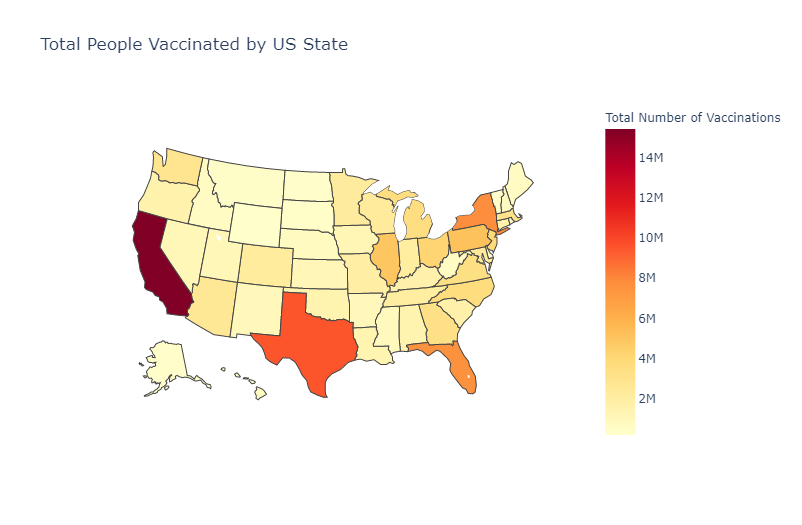

In [23]:
#choropleth map people fully vaccinated
fig4 = px.choropleth(df_vaccinated,locations=df_vaccinated['State Code'],color=df_vaccinated['people_fully_vaccinated'],
                     color_continuous_scale='YlOrRd',locationmode='USA-states',scope='usa',
                     title="Total People Fully Vaccinated by US State",labels={'people_fully_vaccinated':'Number of People Fully Vaccinated'})

fig4.show()

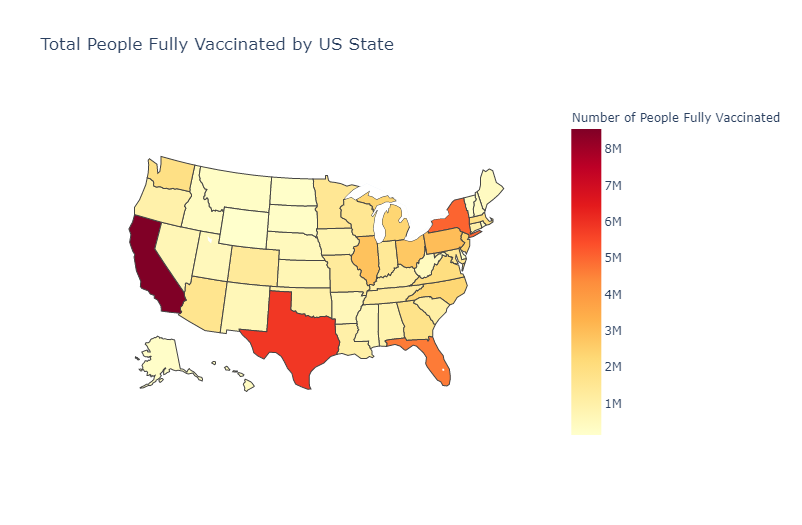

**Vaccinations in California in Week 14**

In [24]:
#vaccinations in California State in the previous week
df_california = df[(df['State Code'] == 'CA')&(df['week']==14)]
df_california = df_california[['date','location','week','State Code','daily_vaccinations']]
df_california

,date,location,week,State Code,daily_vaccinations
635,2021-04-05,California,14,CA,372228.0
636,2021-04-06,California,14,CA,366223.0
637,2021-04-07,California,14,CA,377497.0
638,2021-04-08,California,14,CA,377051.0
639,2021-04-09,California,14,CA,391393.0
640,2021-04-10,California,14,CA,404572.0
641,2021-04-11,California,14,CA,398820.0


In [25]:
#Average daily vaccinations in California
average_CA = df[df['location']=="California"]['daily_vaccinations'].mean()
print("The average daily number of vaccinations in California equals ",average_CA)

The average daily number of vaccinations in California equals  237272.0989010989


In [26]:
y = [average_CA]
daily_vaccination = np.array(df_california.iloc[0:7,4])
daily_vaccination = daily_vaccination.tolist()

#add vaccinations in week 14 to list
y.extend(daily_vaccination)
print(y)

[237272.0989010989, 372228.0, 366223.0, 377497.0, 377051.0, 391393.0, 404572.0, 398820.0]


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



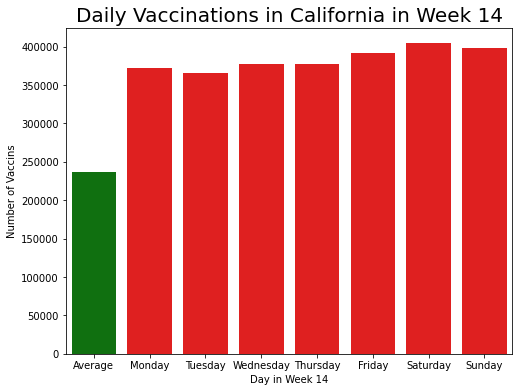

In [27]:
#Vaccinations in California in Week 14
x = ['Average','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
clrs = ['red' if (x != 'Average') else 'green' for x in x ]

fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax = sns.barplot(x,y, palette=clrs)

plt.xlabel('Day in Week 14') # add x-label to the plot
plt.ylabel('Number of Vaccins') # add y-label to the plot
plt.title('Daily Vaccinations in California in Week 14', fontsize = 20)


plt.show()

**This is the end of this analysis.**